# OCCUPANCY DETECTION USING CLASSIFICATION METHODS

To predict room occupancy (Yes or No, binary classification) from a set of experimental data making use of the feature predictors  such as Temperature,Humidity,Light and CO2. 

In the experiment, ground-truth occupancy was obtained from time stamped pictures that were taken every minute. 

Two data sets are considered, for training and testing. The variables in the dataset are :
1. date time year-month-day hour:minute:second 
2. Temperature, in Celsius 
3. Relative Humidity, as % 
4. Light, in Lux 
5. CO2, in ppm 
6. Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air 
7. Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

In [1]:
# Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import datetime
from pylab import rcParams
plt.style.use('ggplot')
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Importing the dataset
training_set = pd.read_csv('datatraining.txt')
test_set = pd.read_csv('datatest.txt')

# Exploratory data analysis

In [3]:
# view dimensions of dataset

training_set.shape

(8143, 7)

In [4]:
training_set.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
training_set.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
8143,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [6]:
col_names = training_set.columns

col_names

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [7]:
# view summary of dataset

training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [8]:
training_set.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [9]:
training_set.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

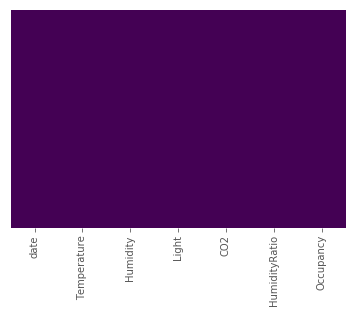

In [10]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data Visualization

In [11]:
Occupied=training_set[training_set['Occupancy']==1]
Not_Occupied=training_set[training_set['Occupancy']==0]

In [12]:
print("Total =", len(training_set))

print("Number of Occupancy  =", len(Occupied))
print("Percentage =", 1.*len(Occupied)/len(training_set)*100.0, "%")
 
print("Number of Occupancy =", len(Not_Occupied))
print("Percentage =", 1.*len(Not_Occupied)/len(training_set)*100.0, "%")

Total = 8143
Number of Occupancy  = 1729
Percentage = 21.232960825248682 %
Number of Occupancy = 6414
Percentage = 78.76703917475132 %


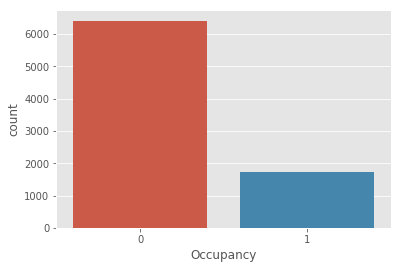

In [13]:
sns.countplot(x='Occupancy',data=training_set)

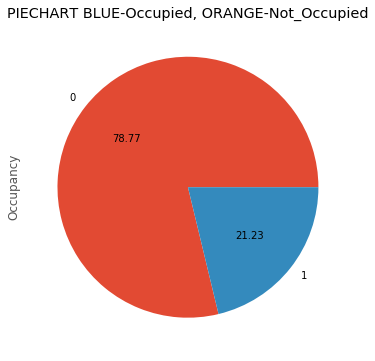

In [15]:
training_set['Occupancy'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("PIECHART BLUE-Occupied, ORANGE-Not_Occupied");

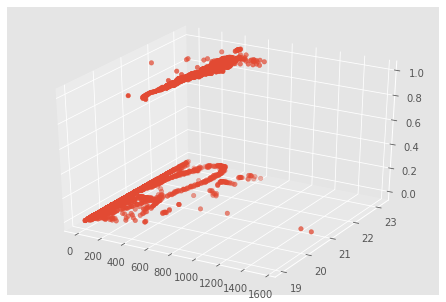

In [16]:
fig = plt.figure()
axes = Axes3D(fig)
axes.scatter(training_set['Light'],training_set['Temperature'],training_set['Occupancy'])
plt.show()

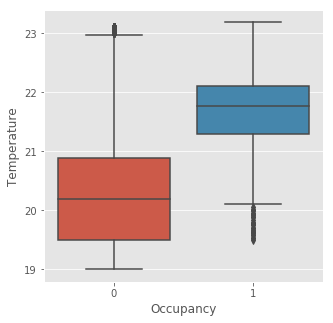

In [17]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Occupancy', y='Temperature',data=training_set)

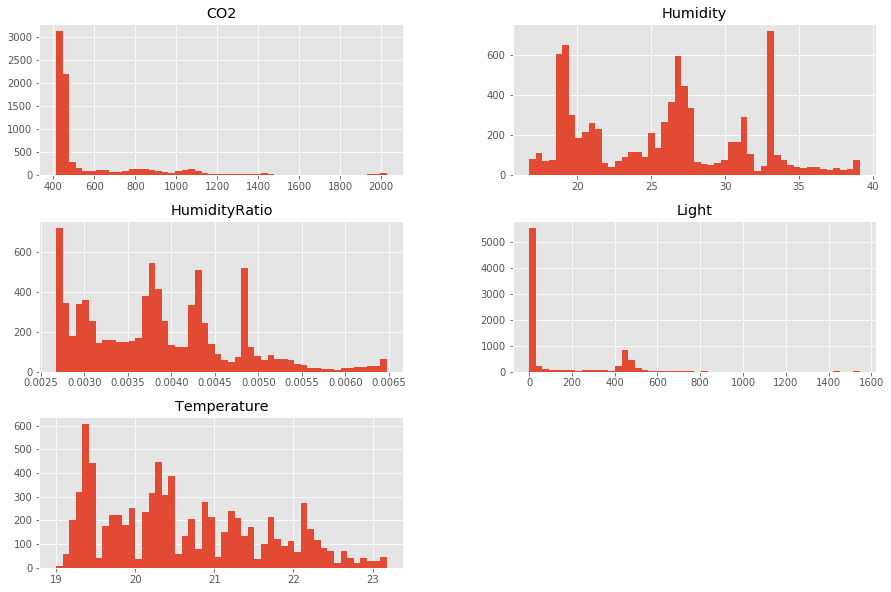

In [18]:
training_set.hist(['Temperature','Humidity','Light','CO2','HumidityRatio'],bins=50, figsize=(15,10));

In [52]:
validate = pd.read_csv('datatraining.txt', header=0, index_col=1, parse_dates=True, squeeze=True)

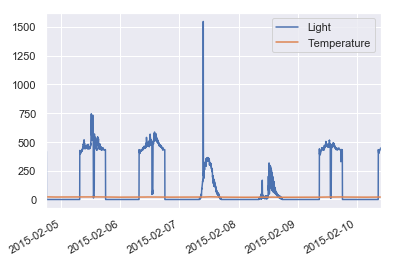

In [56]:
validate[['Light', 'Temperature']].plot()

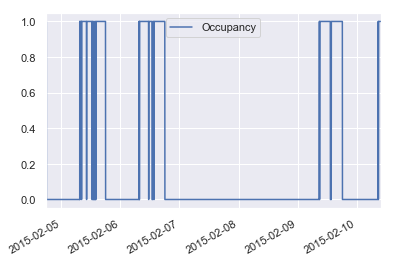

In [57]:
validate[['Occupancy']].plot()

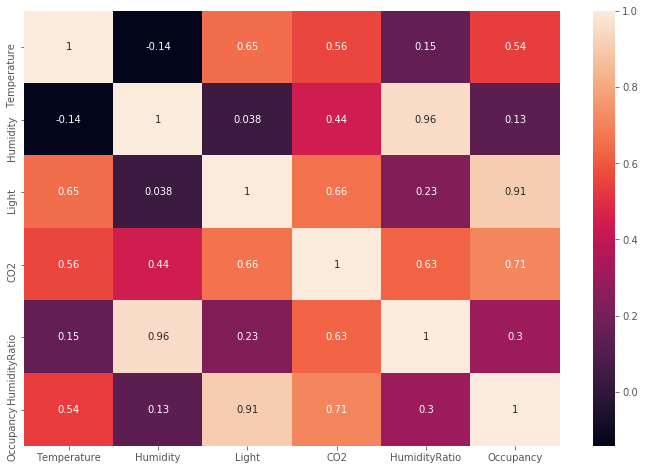

In [19]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(training_set.corr(),annot=True)

C:\Users\Rishabh Saini.LAPTOP-B7TCGRP6\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rishabh Saini.LAPTOP-B7TCGRP6\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


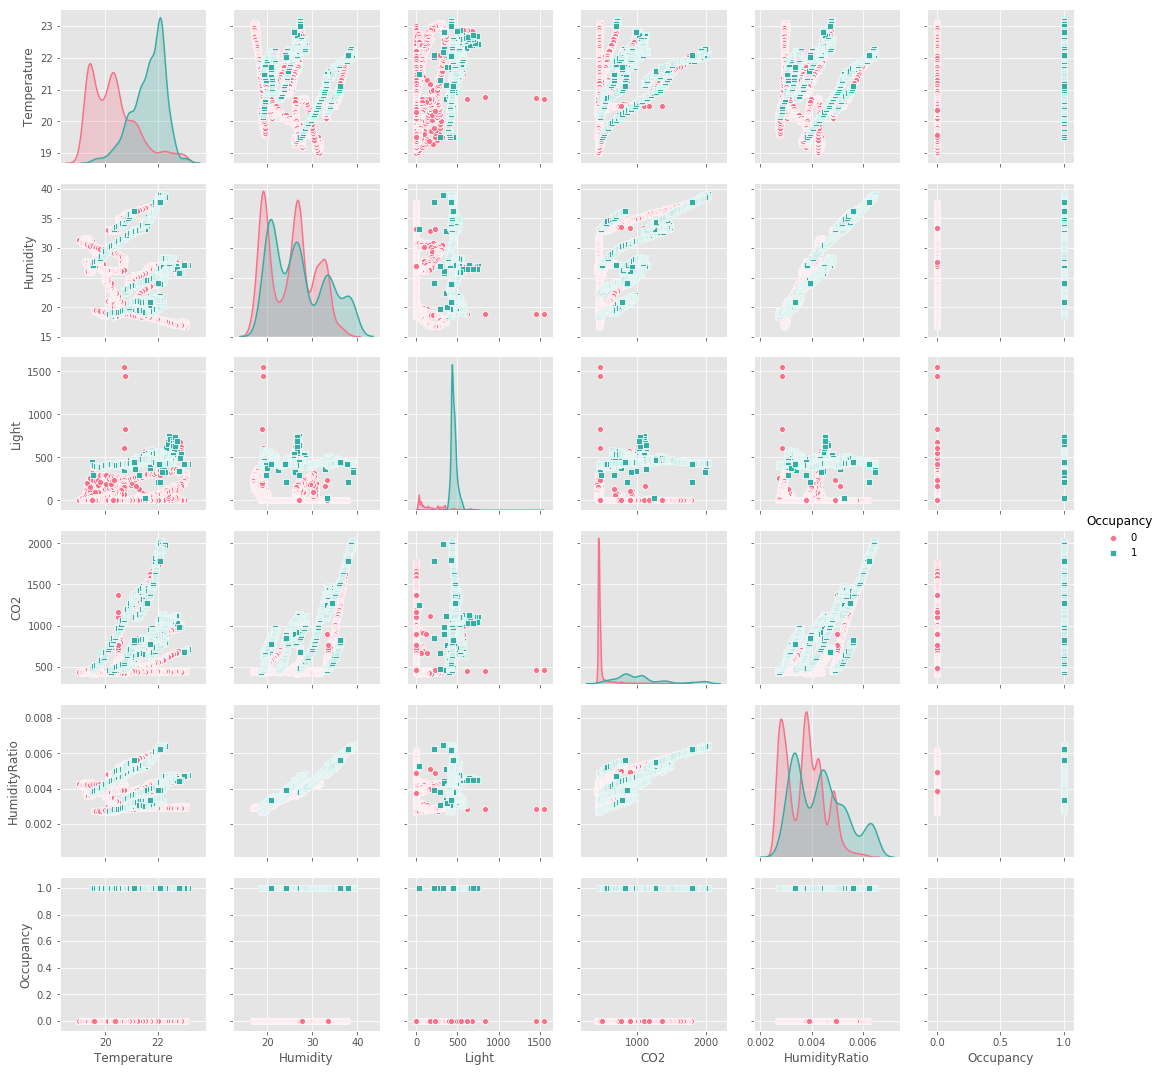

In [20]:
sns.pairplot(training_set, hue='Occupancy',palette="husl",markers=["o", "s"])

# Linear Regression

In [21]:
df=training_set['Light']

In [22]:
X=pd.DataFrame(df)

In [23]:
X

,Light
1,426.0
2,429.5
3,426.0
4,426.0
5,426.0
6,419.0
7,419.0
8,419.0
9,419.0
10,419.0


In [24]:
df1=training_set['Temperature']

In [25]:
y=pd.DataFrame(df1)

In [26]:
y

,Temperature
1,23.180000
2,23.150000
3,23.150000
4,23.150000
5,23.100000
6,23.100000
7,23.100000
8,23.100000
9,23.100000
10,23.075000


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
y_pred = regressor.predict(X_test)

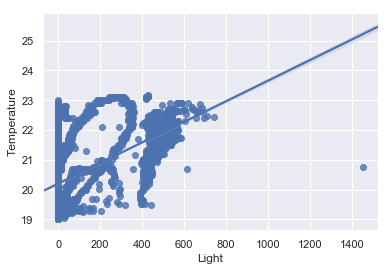

In [30]:
sns.set(color_codes=True)

dataframe_training = pd.DataFrame()
dataframe_training['Light'] = X_train['Light']
dataframe_training['Temperature'] = y_train
ax = sns.regplot(x="Light", y="Temperature", data= dataframe_training)

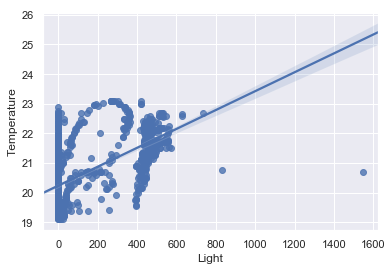

In [31]:
dataframe_test = pd.DataFrame()
dataframe_test['Light'] = X_test['Light']
dataframe_test['Temperature'] = y_test
ax = sns.regplot(x="Light", y="Temperature", data= dataframe_test)

In [32]:
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [[0.00344975]]
Intercept: 
 [20.20626551]


In [33]:
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 0.6175721075812458


In [34]:
print("Variance score: {}".format(r2_score(y_test, y_pred)))

Variance score: 0.3942794811465561


In [35]:
print("r2 score: {}".format(r2_score(y_test,y_pred)))

r2 score: 0.3942794811465561


In [36]:
print("r2 score: {}".format(r2_score(y_test,y_pred)))

r2 score: 0.3942794811465561


In [37]:
import statsmodels.api as sm

In [38]:
x = sm.add_constant(X)

C:\Users\Rishabh Saini.LAPTOP-B7TCGRP6\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
results = sm.OLS(endog = y, exog=x).fit()

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     5954.
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        20:35:55   Log-Likelihood:                -9455.6
No. Observations:                8143   AIC:                         1.892e+04
Df Residuals:                    8141   BIC:                         1.893e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.2135      0.010   2011.424      0.000      20.194      20.233
Light          0.0034    4.4e-05     77.163      0.000       0.003       0.003
==============================================================================
Omnibus:                      412.546   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.614
Skew:                           0.559   Prob(JB):                    1.59e-105
Kurtosis:                       3.417   Cond. No.                         268.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# POLYNOMIAL REGRESSION

In [41]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1) 

In [42]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 2) #try 2,3 and 4
X_polynomial = polynomial_regressor.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_poly_pred = linear_regressor_2.predict(X_polynomial)

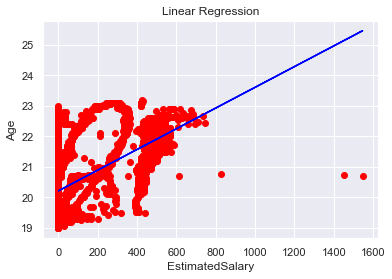

In [45]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('EstimatedSalary')
plt.ylabel('Age')
plt.show()


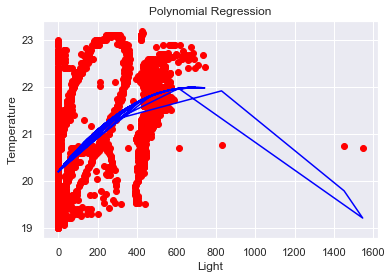

In [48]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor_2.predict(polynomial_regressor.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Light')
plt.ylabel('Temperature')
plt.show()

In [47]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("Root Mean Square Error:", rmse)
print("R2 Score:", r2)

Root Mean Square Error: 0.7648779003718247
R2 Score: 0.4341946820717123


# Logistic Regression

In [76]:
X = training_set.iloc[:, [1,3]].values
y = training_set.iloc[:, 6].values

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [79]:
X_train

array([[-0.90385015, -0.61372607],
       [-1.33655731, -0.54183676],
       [ 0.26642602, -0.61372607],
       ...,
       [ 0.26642602, -0.61372607],
       [ 0.65979616,  1.64565213],
       [ 1.45637069,  1.94861421]])

In [80]:
y_train

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [81]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Rishabh Saini.LAPTOP-B7TCGRP6\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
y_proba = classifier.predict_proba(X_train)
y_proba

array([[9.99164451e-01, 8.35548876e-04],
       [9.98321964e-01, 1.67803565e-03],
       [9.99677421e-01, 3.22579233e-04],
       ...,
       [9.99677421e-01, 3.22579233e-04],
       [7.47009745e-02, 9.25299026e-01],
       [3.46643688e-02, 9.65335631e-01]])

In [83]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [84]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)

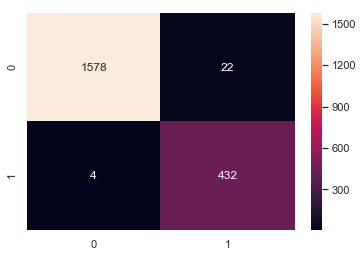

In [86]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [87]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

Accuracy: 0.9872298624754421


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1600
           1       0.95      0.99      0.97       436

   micro avg       0.99      0.99      0.99      2036
   macro avg       0.97      0.99      0.98      2036
weighted avg       0.99      0.99      0.99      2036



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


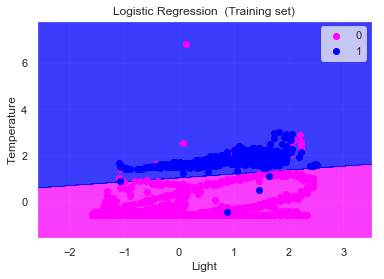

In [89]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Logistic Regression  (Training set)')
plt.xlabel('Light')
plt.ylabel('Temperature')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


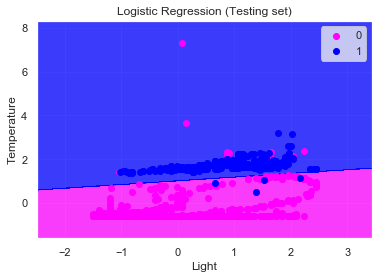

In [90]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('Light')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# SVM

In [91]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

C:\Users\Rishabh Saini.LAPTOP-B7TCGRP6\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

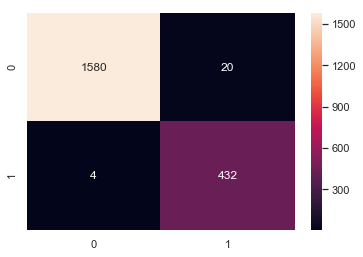

In [94]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [95]:
cm

array([[1580,   20],
       [   4,  432]], dtype=int64)

In [97]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1600
           1       0.96      0.99      0.97       436

   micro avg       0.99      0.99      0.99      2036
   macro avg       0.98      0.99      0.98      2036
weighted avg       0.99      0.99      0.99      2036



In [96]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy is :",acc)

Accuracy is : 0.9882121807465619


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


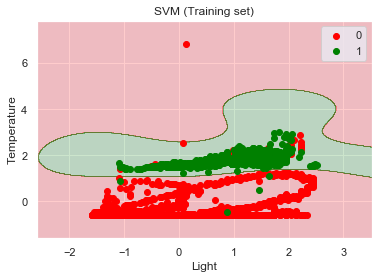

In [98]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Light')
plt.ylabel('Temperature')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


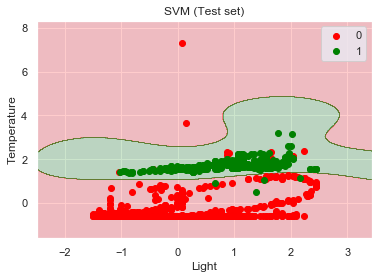

In [99]:
# from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Light')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [101]:
y_pred = classifier.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

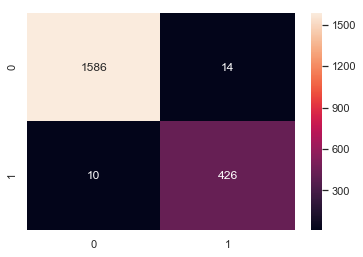

In [103]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [104]:
print("Confusion Matrix is:",cm)

Confusion Matrix is: [[1586   14]
 [  10  426]]


In [106]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1600
           1       0.97      0.98      0.97       436

   micro avg       0.99      0.99      0.99      2036
   macro avg       0.98      0.98      0.98      2036
weighted avg       0.99      0.99      0.99      2036



In [105]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy is :",acc)

Accuracy is : 0.9882121807465619


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


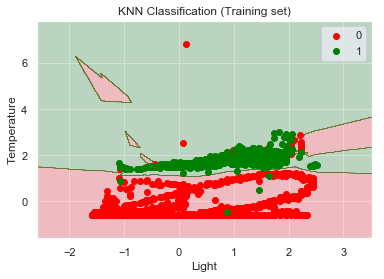

In [107]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Training set)')
plt.xlabel('Light')
plt.ylabel('Temperature')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


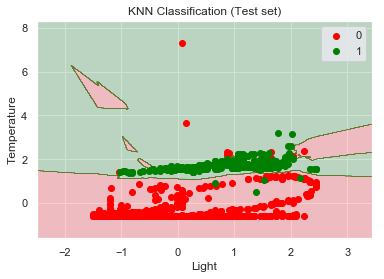

In [108]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Light')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# NAIVE BAYES

In [109]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [110]:
y_pred = classifier.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

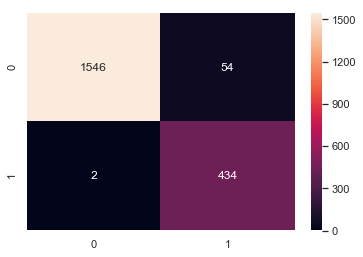

In [112]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [113]:
cm

array([[1546,   54],
       [   2,  434]], dtype=int64)

In [115]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1600
           1       0.89      1.00      0.94       436

   micro avg       0.97      0.97      0.97      2036
   macro avg       0.94      0.98      0.96      2036
weighted avg       0.98      0.97      0.97      2036



In [114]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy is :",acc)

Accuracy is : 0.9724950884086444


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


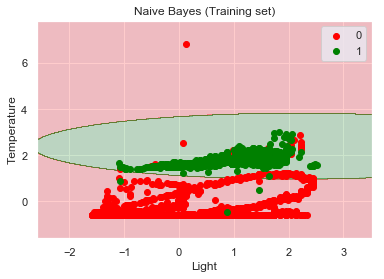

In [116]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Light')
plt.ylabel('Temperature')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


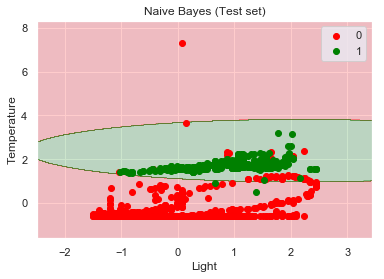

In [118]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Light')
plt.ylabel('Temperature')
plt.legend()
plt.show()